In [112]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
import scipy.interpolate as interp
import scipy.integrate as integrate
from astropy import units as u

In [2]:
hdu = fits.open('alpha_lyr_stis_008.fits')
# hdu.info()
# hdu[1].columns
# hdu[1].header
rawwavelength=hdu[1].data['WAVELENGTH']
rawflux=hdu[1].data['FLUX']

In [3]:
hdu[1].columns.names,hdu[1].columns.units

(['WAVELENGTH', 'FLUX', 'STATERROR', 'SYSERROR', 'FWHM', 'DATAQUAL', 'TOTEXP'],
 ['ANGSTROMS', 'FLAM', 'FLAM', 'FLAM', 'ANGSTROMS', 'NONE', 'SEC'])

Units:  flam = erg cm^-2 s^-1 Ang^-1

Reference: http://ssb.stsci.edu/doc/stsci_python_2.14/pysynphot-0.9.5.doc/html/units.html

In [4]:
flux=rawflux * u.erg / (u.cm * u.cm * u.s * u.AA)
wavelength=rawwavelength * u.AA

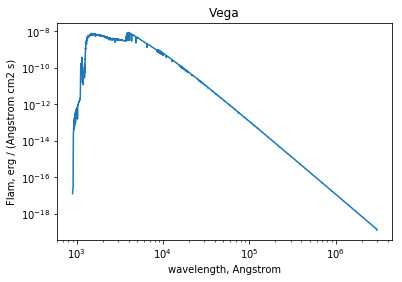

In [5]:
plt.loglog(wavelength,flux)
plt.ylabel('Flam, '+str(flux.unit))
plt.xlabel('wavelength, '+str(wavelength.unit))
plt.title('Vega')

In [39]:
x,y=np.loadtxt('BessellMurphy_V.txt',unpack=True)
bandwav=x*u.AA
bandpass=y


In [40]:
np.max(bandwav)

<Quantity 7400.0 Angstrom>

In [41]:
bandinterp=interp.interp1d(bandwav,bandpass)


In [27]:
inband=np.logical_and(wavelength>np.min(bandwav),wavelength<np.max(bandwav))
# has the size of wavelengths, true where in the filter bandpass

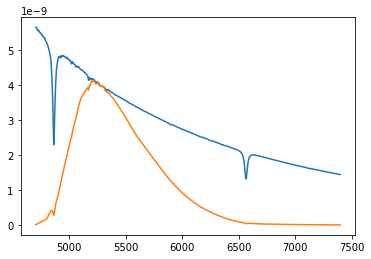

In [28]:
plt.plot(wavelength[inband],flux[inband])
plt.plot(wavelength[inband],flux[inband]*bandinterp(wavelength[inband]))

In [29]:
sourcesum=integrate.trapz(flux[inband]*wavelength[inband]*bandinterp(wavelength[inband]),
                          x=wavelength[inband])
sourcesum

<Quantity 0.017224548934813618 Angstrom erg / (cm2 s)>

In [30]:
mag=2.5*np.log10(sourcesum.value)

mag

-4.409630355725934

In [82]:
samplex,sampley=np.loadtxt('test.txt',unpack=True)
samplewavelength=samplex*u.micron
sampleflux=sampley*u.erg / (u.cm * u.cm * u.s * u.AA)

In [83]:
inband=np.logical_and(samplewavelength>np.min(bandwav),samplewavelength<np.max(bandwav))

In [87]:
bandinterp=interp.interp1d(bandwav.to(samplewavelength.unit),bandpass)

In [88]:
samplewavelength,bandwav

(<Quantity [ 0.320097, 0.320201, 0.320305,...,  0.870203, 0.87045 ,
             0.870698] micron>,
 <Quantity [ 4700., 4800., 4900., 5000., 5100., 5200., 5300., 5400., 5500.,
             5600., 5700., 5800., 5900., 6000., 6100., 6200., 6300., 6400.,
             6500., 6600., 6700., 6800., 6900., 7000., 7100., 7200., 7300.,
             7400.] Angstrom>)

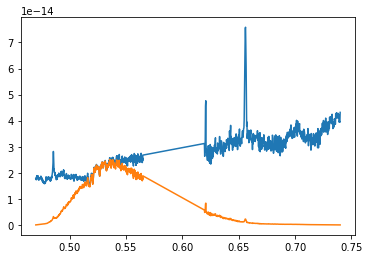

In [89]:
plt.plot(samplewavelength[inband],sampleflux[inband])
plt.plot(samplewavelength[inband],sampleflux[inband]*bandinterp(samplewavelength[inband]))

In [90]:
junk=5*u.m

In [95]:
junk.to(samplewavelength.unit)

<Quantity 5000000.0 micron>

In [96]:
junk=junk.to(samplewavelength.unit)
junk

<Quantity 5000000.0 micron>

In [103]:
def getMag(band,wavelength,flux):
    
    hdu = fits.open('alpha_lyr_stis_008.fits')
    rawwavelength=hdu[1].data['WAVELENGTH']
    rawflux=hdu[1].data['FLUX']
    vegaflux=rawflux * u.erg / (u.cm * u.cm * u.s * u.AA)
    vegawavelength=rawwavelength * u.AA
    # note: interpolation doesn't work in mixed units, so must convert    
    vegawavelength=vegawavelength.to(wavelength.unit)
    
    x,y=np.loadtxt('BessellMurphy_'+band+'.txt',unpack=True)
    bandwav=x*u.AA
    bandpass=y
    
    # note: interpolation doesn't work in mixed units, so must convert    
    # function to compute band at arbitrary wavelength
    bandinterp=interp.interp1d(bandwav.to(wavelength.unit),bandpass)
    
    # has the size of wavelengths, TRUE where wavelength in the filter bandpass
    inband=np.logical_and(wavelength>np.min(bandwav),wavelength<np.max(bandwav))
    vegainband=np.logical_and(vegawavelength>np.min(bandwav),vegawavelength<np.max(bandwav))
        
    sourcesum=integrate.trapz(flux[inband]*wavelength[inband]*bandinterp(wavelength[inband]),
                          x=wavelength[inband])
    vegasum=integrate.trapz(vegaflux[vegainband]*vegawavelength[vegainband]*bandinterp(vegawavelength[vegainband]),
                          x=vegawavelength[vegainband])
    
    return -2.5*np.log10(np.abs(sourcesum)/vegasum)

In [105]:
getMag('V',samplewavelength,sampleflux)

<Quantity 12.916799666133553>

In [111]:
getMag('I',samplewavelength,sampleflux)

<Quantity 11.138187622381178>

In [118]:
xxx=['a','b']
yyy='c'


In [114]:
np.isin(yyy,xxx)

AttributeError: module 'numpy' has no attribute 'isin'

In [119]:
yyy in xxx

False